In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from utils_ccd import get_connection

conn = get_connection()

In [2]:
sql_nereu = """
SELECT p.numero_processo, p.ano_processo, p.codigo_tipo_processo, p.assunto, r.nome, pm.Descricao as marcador
FROM processo.dbo.Processos p 
	INNER JOIN processo.dbo.Pro_MarcadorProcesso pmp ON p.IdProcesso = pmp.IdProcesso
	INNER JOIN processo.dbo.Pro_Marcador pm ON pm.IdMarcador = pmp.IdMarcador 
	INNER JOIN processo.dbo.Relator r ON r.codigo = p.codigo_relator 
WHERE setor_atual = 'CCD' 
	AND lower(pm.Descricao) = 'DESCONTO EM FOLHA - Nereu'
"""
processos_nereu = pd.read_sql(sql_nereu, conn)

/tmp/ipykernel_52252/2968565797.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  processos_nereu = pd.read_sql(sql_nereu, conn)


In [3]:
processos_nereu

,numero_processo,ano_processo,codigo_tipo_processo,assunto,nome,marcador
0,011525,2009,APO,APOSENTADORIA ...,CARLOS THOMPSON COSTA FERNANDES,DESCONTO EM FOLHA - Nereu
1,012970,2017,EXE,EXECUÇÃO DA DECISÃO PROFERIDA NOS AUTOS DO PRO...,CARLOS THOMPSON COSTA FERNANDES,DESCONTO EM FOLHA - Nereu
2,000096,2022,EXE,EXECUÇÃO DA DECISÃO PROFERIDA NOS AUTOS DO PRO...,ANTONIO ED SOUZA SANTANA,DESCONTO EM FOLHA - Nereu
3,000098,2022,EXE,EXECUÇÃO DA DECISÃO PROFERIDA NOS AUTOS DO PRO...,ANTONIO ED SOUZA SANTANA,DESCONTO EM FOLHA - Nereu
4,000099,2022,EXE,EXECUÇÃO DA DECISÃO PROFERIDA NOS AUTOS DO PRO...,ANTONIO ED SOUZA SANTANA,DESCONTO EM FOLHA - Nereu
...,...,...,...,...,...,...
331,004895,2024,EXE,EXECUÇÃO DA DECISÃO PROFERIDA NOS AUTOS DO PRO...,PAULO ROBERTO CHAVES ALVES,DESCONTO EM FOLHA - Nereu
332,004898,2024,EXE,EXECUÇÃO DA DECISÃO PROFERIDA NOS AUTOS DO PRO...,ANTONIO ED SOUZA SANTANA,DESCONTO EM FOLHA - Nereu
333,004908,2024,EXE,EXECUÇÃO DA DECISÃO PROFERIDA NOS AUTOS DO PRO...,FRANCISCO POTIGUAR CAVALCANTI JÚNIOR,DESCONTO EM FOLHA - Nereu
334,000069,2025,EXE,EXECUÇÃO DA DECISÃO PROFERIDA NOS AUTOS DO PRO...,CARLOS THOMPSON COSTA FERNANDES,DESCONTO EM FOLHA - Nereu


In [4]:
nereu_relator = processos_nereu.groupby('nome').numero_processo.count().reset_index().sort_values('numero_processo', ascending=False)

In [5]:
nereu_relator.columns = ['Relator', 'Quantidade']

In [6]:
nereu_relator

,Relator,Quantidade
1,ANTONIO ED SOUZA SANTANA,158
5,PAULO ROBERTO CHAVES ALVES,76
3,CARLOS THOMPSON COSTA FERNANDES,54
2,ANTONIO GILBERTO DE OLIVEIRA JALES,34
0,ANA PAULA DE OLIVEIRA GOMES,13
4,FRANCISCO POTIGUAR CAVALCANTI JÚNIOR,1


/tmp/ipykernel_52252/1614309008.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=nereu_relator, x='Relator', y='Quantidade', palette='viridis')


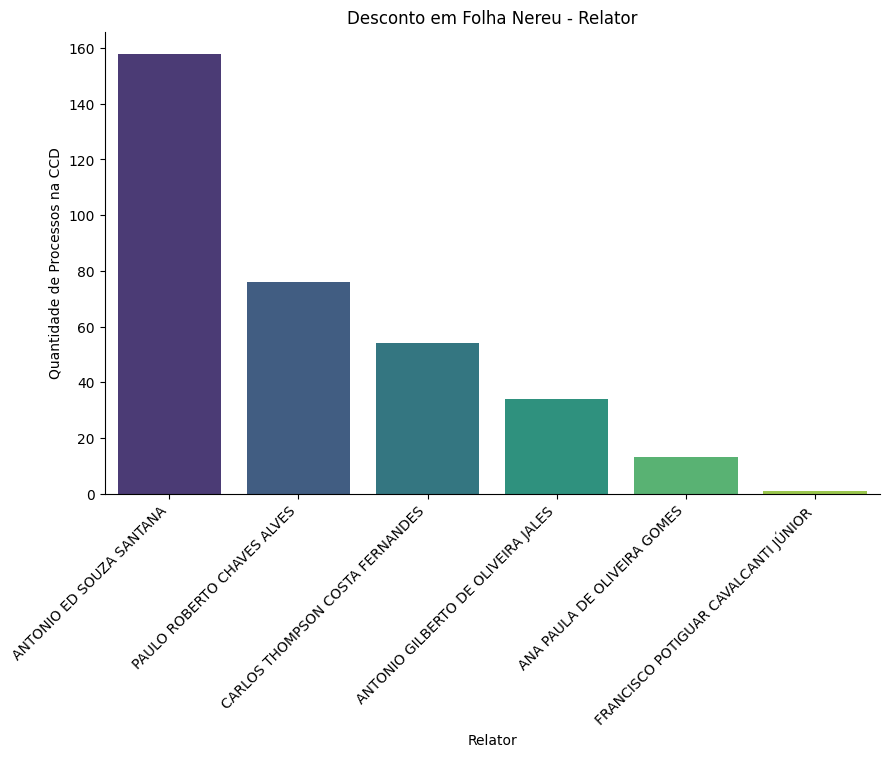

In [7]:
plt.figure(figsize=(10, 6))
sns.barplot(data=nereu_relator, x='Relator', y='Quantidade', palette='viridis')
plt.xticks(rotation=45, ha='right')
sns.despine(right=True, top=True)
plt.title('Desconto em Folha Nereu - Relator')
plt.xlabel('Relator')
plt.ylabel('Quantidade de Processos na CCD')
plt.show()

In [8]:
processos_ed = processos_nereu[processos_nereu.nome == 'ANTONIO ED SOUZA SANTANA']

In [9]:
processos_ed.codigo_tipo_processo.unique()

array(['EXE'], dtype=object)

In [10]:
processos_ed

,numero_processo,ano_processo,codigo_tipo_processo,assunto,nome,marcador
2,000096,2022,EXE,EXECUÇÃO DA DECISÃO PROFERIDA NOS AUTOS DO PRO...,ANTONIO ED SOUZA SANTANA,DESCONTO EM FOLHA - Nereu
3,000098,2022,EXE,EXECUÇÃO DA DECISÃO PROFERIDA NOS AUTOS DO PRO...,ANTONIO ED SOUZA SANTANA,DESCONTO EM FOLHA - Nereu
4,000099,2022,EXE,EXECUÇÃO DA DECISÃO PROFERIDA NOS AUTOS DO PRO...,ANTONIO ED SOUZA SANTANA,DESCONTO EM FOLHA - Nereu
6,000110,2022,EXE,EXECUÇÃO DA DECISÃO PROFERIDA NOS AUTOS DO PRO...,ANTONIO ED SOUZA SANTANA,DESCONTO EM FOLHA - Nereu
7,000137,2022,EXE,EXECUÇÃO DA DECISÃO PROFERIDA NOS AUTOS DO PRO...,ANTONIO ED SOUZA SANTANA,DESCONTO EM FOLHA - Nereu
...,...,...,...,...,...,...
326,003397,2024,EXE,EXECUÇÃO DA DECISÃO PROFERIDA NOS AUTOS DO PRO...,ANTONIO ED SOUZA SANTANA,DESCONTO EM FOLHA - Nereu
327,003401,2024,EXE,EXECUÇÃO DA DECISÃO PROFERIDA NOS AUTOS DO PRO...,ANTONIO ED SOUZA SANTANA,DESCONTO EM FOLHA - Nereu
328,003409,2024,EXE,EXECUÇÃO DA DECISÃO PROFERIDA NOS AUTOS DO PRO...,ANTONIO ED SOUZA SANTANA,DESCONTO EM FOLHA - Nereu
329,003410,2024,EXE,EXECUÇÃO DA DECISÃO PROFERIDA NOS AUTOS DO PRO...,ANTONIO ED SOUZA SANTANA,DESCONTO EM FOLHA - Nereu


In [11]:
sql_debitos = '''  

SELECT DISTINCT pro.numero_processo,
       pro.ano_processo,
       pro.assunto,
       etd.Descricao as tipo_multa,
       pm.Descricao as descricao,
       CONCAT(gp.Nome, ' (CPF: ', gp.Documento, ')') as nome,
       processo.dbo.fn_Exe_RetornaValorAtualizado(ed.IdDebito) as valor_multa,
       ed.CodigoStatusDivida as status_divida,
       r.nome as relator
	FROM processo.dbo.Processos pro
	INNER JOIN processo.dbo.Pro_MarcadorProcesso pmp ON pmp.IdProcesso = pro.IdProcesso
	INNER JOIN processo.dbo.Pro_Marcador pm ON pmp.IdMarcador = pm.IdMarcador
	INNER JOIN processo.dbo.Relator r ON r.codigo = pro.codigo_relator 
	LEFT JOIN processo.dbo.Exe_Debito ed ON ed.IdProcessoExecucao = pro.IdProcesso
	LEFT JOIN processo.dbo.Exe_DebitoPessoa edp ON edp.IDDebito = ed.IdDebito
	LEFT JOIN processo.dbo.Exe_TipoDebito etd ON etd.CodigoTipoDebito = ed.CodigoTipoDebito
	LEFT JOIN processo.dbo.GenPessoa gp ON gp.IdPessoa = edp.IDPessoa
	WHERE pro.setor_atual = 'CCD'
	AND pm.Descricao = 'DESCONTO EM FOLHA - Nereu'
	

'''

debitos = pd.read_sql(sql_debitos, conn)

/tmp/ipykernel_52252/1911918833.py:26: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  debitos = pd.read_sql(sql_debitos, conn)


In [12]:
debitos_ed = debitos[debitos.relator == 'ANTONIO ED SOUZA SANTANA']

In [13]:
debitos_ed.groupby(['tipo_multa']).agg({'valor_multa': 'sum', 'numero_processo': 'count'}).reset_index().sort_values('valor_multa', ascending=False)

,tipo_multa,valor_multa,numero_processo
0,Multa,1.256702e+06,96
1,Multa Cominatória,7.994859e+05,66


In [14]:
graph_debitos = debitos_ed.groupby('tipo_multa').agg({'valor_multa': 'sum', 'numero_processo': 'count'}).reset_index()

In [15]:
pd.options.display.float_format = '{:,.2f}'.format

In [16]:
graph_debitos

,tipo_multa,valor_multa,numero_processo
0,Multa,"1,256,701.62",96
1,Multa Cominatória,"799,485.92",66


/tmp/ipykernel_52252/4127177992.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=graph_debitos, x='tipo_multa', y='valor_multa', palette='viridis')


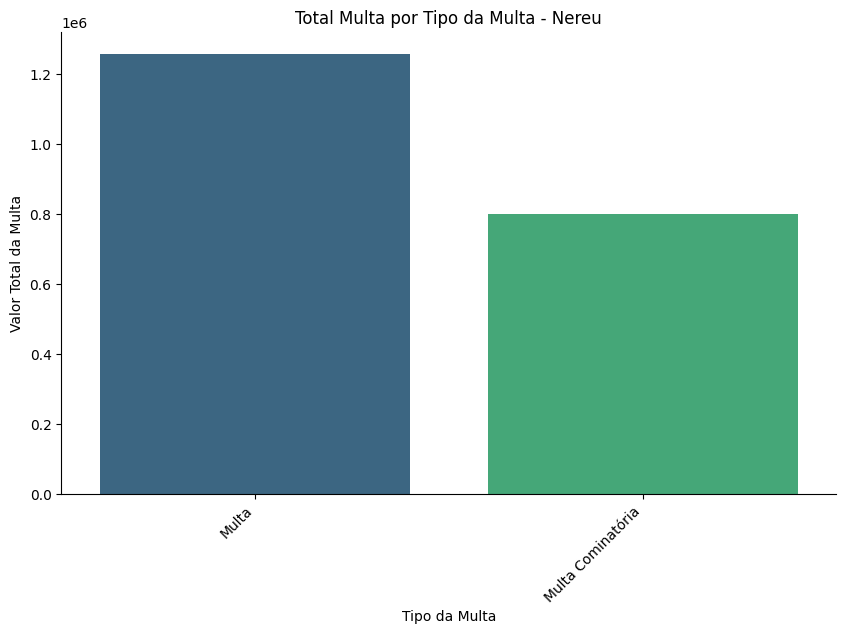

In [17]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=graph_debitos, x='tipo_multa', y='valor_multa', palette='viridis')
plt.xticks(rotation=45, ha='right')
sns.despine(right=True, top=True)
plt.title('Total Multa por Tipo da Multa - Nereu')
plt.xlabel('Tipo da Multa')
plt.ylabel('Valor Total da Multa')
plt.show()

In [18]:
graph_debitos['valor_multa'].sum()

np.float64(2056187.5351)

In [19]:
import locale

# Set locale to Brazilian Portuguese
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')

# Sum of valor_multa
total_valor_multa = graph_debitos['valor_multa'].sum()

# Print the sum in BRL currency format
print(locale.currency(total_valor_multa, grouping=True))

R$ 2.056.187,54


In [20]:
debitos_ed

,numero_processo,ano_processo,assunto,tipo_multa,descricao,nome,valor_multa,status_divida,relator
2,000096,2022,EXECUÇÃO DA DECISÃO PROFERIDA NOS AUTOS DO PRO...,Multa,DESCONTO EM FOLHA - Nereu,Nereu Batista Linhares - Presidente do Ipern (...,"13,902.56",1.00,ANTONIO ED SOUZA SANTANA
4,000098,2022,EXECUÇÃO DA DECISÃO PROFERIDA NOS AUTOS DO PRO...,Multa,DESCONTO EM FOLHA - Nereu,Nereu Batista Linhares - Presidente do Ipern (...,"12,590.20",1.00,ANTONIO ED SOUZA SANTANA
5,000099,2022,EXECUÇÃO DA DECISÃO PROFERIDA NOS AUTOS DO PRO...,Multa,DESCONTO EM FOLHA - Nereu,Nereu Batista Linhares - Presidente do Ipern (...,"13,897.00",15.00,ANTONIO ED SOUZA SANTANA
6,000099,2022,EXECUÇÃO DA DECISÃO PROFERIDA NOS AUTOS DO PRO...,Multa Cominatória,DESCONTO EM FOLHA - Nereu,Nereu Batista Linhares - Presidente do Ipern (...,"11,516.30",1.00,ANTONIO ED SOUZA SANTANA
11,000110,2022,EXECUÇÃO DA DECISÃO PROFERIDA NOS AUTOS DO PRO...,Multa,DESCONTO EM FOLHA - Nereu,Nereu Batista Linhares - Presidente do Ipern (...,"12,585.16",1.00,ANTONIO ED SOUZA SANTANA
...,...,...,...,...,...,...,...,...,...
351,003409,2024,EXECUÇÃO DA DECISÃO PROFERIDA NOS AUTOS DO PRO...,Multa Cominatória,DESCONTO EM FOLHA - Nereu,Nereu Batista Linhares - Presidente do Ipern (...,"11,388.60",1.00,ANTONIO ED SOUZA SANTANA
352,003410,2024,EXECUÇÃO DA DECISÃO PROFERIDA NOS AUTOS DO PRO...,Multa Cominatória,DESCONTO EM FOLHA - Nereu,Nereu Batista Linhares - Presidente do Ipern (...,"11,724.05",1.00,ANTONIO ED SOUZA SANTANA
362,003671,2022,EXECUÇÃO DA DECISÃO PROFERIDA NOS AUTOS DO PRO...,Multa,DESCONTO EM FOLHA - Nereu,Nereu Batista Linhares - Presidente do Ipern (...,"13,593.06",1.00,ANTONIO ED SOUZA SANTANA
380,003700,2022,EXECUÇÃO DA DECISÃO PROFERIDA NOS AUTOS DO PRO...,Multa,DESCONTO EM FOLHA - Nereu,Nereu Batista Linhares - Presidente do Ipern (...,"1,161.09",1.00,ANTONIO ED SOUZA SANTANA


## Processo 3474/2021

In [23]:
'''
df_planilha_1 = pd.read_excel('docs/planilha_processos_nereu_cut.xlsx', sheet_name='Table 1')
df_planilha_2 = pd.read_excel('docs/planilha_processos_nereu_cut.xlsx', sheet_name='Table 2')
df_planilha_3 = pd.read_excel('docs/planilha_processos_nereu_cut.xlsx', sheet_name='Table 3')
df_planilha_4 = pd.read_excel('docs/planilha_processos_nereu_cut.xlsx', sheet_name='Table 4')

df_planilha = pd.concat([df_planilha_1, df_planilha_2, df_planilha_3, df_planilha_4])

df_planilha['Nº do Processo'].fillna('/', inplace=True)

df_planilha['numero_processo'] = df_planilha['Nº do Processo'].apply(lambda x: x.split('/')[0].strip())
df_planilha['ano_processo'] = df_planilha['Nº do Processo'].apply(lambda x: x.split('/')[1].strip())
df_planilha['processo'] = df_planilha['numero_processo'] + '/' + df_planilha['ano_processo']

processos_ed['processo'] = processos_ed['numero_processo'].astype(str) + '/' + processos_ed['ano_processo'].astype(str)

qtd_processos_planilha = len(processos_ed[processos_ed['processo'].isin(df_planilha['processo'])])

if not qtd_processos_planilha:
    print(f'Nenhum dos processos está na planilha ({qtd_processos_planilha})')

'''

"\ndf_planilha_1 = pd.read_excel('docs/planilha_processos_nereu_cut.xlsx', sheet_name='Table 1')\ndf_planilha_2 = pd.read_excel('docs/planilha_processos_nereu_cut.xlsx', sheet_name='Table 2')\ndf_planilha_3 = pd.read_excel('docs/planilha_processos_nereu_cut.xlsx', sheet_name='Table 3')\ndf_planilha_4 = pd.read_excel('docs/planilha_processos_nereu_cut.xlsx', sheet_name='Table 4')\n\ndf_planilha = pd.concat([df_planilha_1, df_planilha_2, df_planilha_3, df_planilha_4])\n\ndf_planilha['Nº do Processo'].fillna('/', inplace=True)\n\ndf_planilha['numero_processo'] = df_planilha['Nº do Processo'].apply(lambda x: x.split('/')[0].strip())\ndf_planilha['ano_processo'] = df_planilha['Nº do Processo'].apply(lambda x: x.split('/')[1].strip())\ndf_planilha['processo'] = df_planilha['numero_processo'] + '/' + df_planilha['ano_processo']\n\nprocessos_ed['processo'] = processos_ed['numero_processo'].astype(str) + '/' + processos_ed['ano_processo'].astype(str)\n\nqtd_processos_planilha = len(processos_ed

## Informação Processo 000096/2022